# Wine Dataset

Nesta célula, estamos importando as bibliotecas necessárias para o uso de um classificador de rede neural do tipo Perceptron Multicamadas (MLP). O MLPClassifier do sklearn.neural_network será utilizado para treinar uma rede neural para classificação. Também importamos as mesmas bibliotecas usadas anteriormente, como train_test_split para divisão dos dados e funções para avaliação de desempenho (accuracy_score, ConfusionMatrixDisplay, e confusion_matrix). Além disso, importamos matplotlib.pyplot para gerar gráficos e visualizar os resultados.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns



Nesta célula, criamos um DataFrame chamado df_wine, que contém os dados do conjunto de dados de vinhos. As colunas representam características químicas dos vinhos, e a coluna target indica a classe à qual cada vinho pertence (existem três classes). Utilizamos head() para exibir as primeiras cinco amostras do DataFrame, facilitando a compreensão da estrutura dos dados.



In [ ]:
wine = load_wine()

df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Aqui, exibimos as classes-alvo do conjunto de dados de vinhos. As classes são denominadas class_0, class_1 e class_2, representando diferentes tipos de vinhos. Essa informação é importante para entendermos a tarefa de classificação que será realizada posteriormente.

In [ ]:
wine.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Nesta célula, dividimos o DataFrame em duas partes:

X (as variáveis explicativas) contém todas as colunas que representam as características químicas do vinho.
y (a variável alvo) contém a classe correspondente a cada vinho. Essa separação é necessária para realizar a tarefa de classificação, onde X é utilizado para fazer previsões de y.


In [ ]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']

Aqui, utilizamos a função train_test_split para dividir os dados em dois subconjuntos: treino (80%) e teste (20%). O conjunto de treino será usado para ajustar o modelo, enquanto o conjunto de teste será utilizado para avaliar seu desempenho. O parâmetro random_state=42 garante a reprodutibilidade dos resultados, mantendo a mesma divisão dos dados a cada execução.

Esses textos detalham as funções de cada célula de maneira didática. Se precisar de mais descrições para outras células ou se quiser ajustes nos textos, estou à disposição!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


A técnica de dividir o conjunto de dados em duas partes, uma para treino e outra para teste, é chamada de Holdout.

No Holdout, o conjunto de dados é dividido de maneira fixa em duas ou mais partes:

Treino (Training set): Utilizado para treinar o modelo, ou seja, para que ele aprenda padrões nos dados.
Teste (Test set): Utilizado para avaliar o desempenho do modelo em dados que ele nunca viu, simulando sua performance em novos dados.

## classificação

Nesta célula, criamos uma instância do MLPClassifier com uma configuração específica:

hidden_layer_sizes=(100,): Define que a rede neural terá uma única camada oculta com 100 neurônios.
max_iter=1000: Define o número máximo de iterações para o otimizador, que neste caso será 1000.
random_state=42: Garante que os resultados sejam reproduzíveis, mantendo a aleatoriedade consistente em cada execução.
Esse classificador será utilizado para ajustar os dados e realizar previsões no problema de classificação de vinhos.

![Diagrama de uma MLP](https://raw.githubusercontent.com/tfs4/datasets_ufg/main/NeuralNetwork314202013722AM.png)


In [ ]:
mpl = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)


Aqui, usamos o método fit() para treinar o MLPClassifier com os dados de treino (X_train e y_train). Isso significa que o modelo agora aprenderá os padrões presentes nos dados para prever corretamente a classe dos vinhos.

In [ ]:
mpl.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=42)

é interessante observar que mensagem de aviso indica que o otimizador atingiu o número máximo de iterações sem convergir, sugerindo que aumentar o valor de max_iter poderia ajudar a melhorar o ajuste.

Depois de treinar o modelo, usamos o método predict() para realizar previsões no conjunto de teste (X_test). O modelo utilizará o que aprendeu durante o treinamento para prever as classes dos vinhos presentes no conjunto de teste.

In [ ]:
y_pred = mpl.predict(X_test)


Aqui, calculamos a acurácia do modelo, que é a proporção de previsões corretas em relação ao total de previsões. Utilizamos a função accuracy_score() para comparar as previsões (y_pred) com os rótulos verdadeiros (y_test), e o valor da acurácia é exibido. Neste caso, o modelo obteve uma acurácia de aproximadamente 97.22%.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9722222222222222


Nesta célula, geramos a matriz de confusão utilizando confusion_matrix() e a visualizamos como um mapa de calor (heatmap) usando seaborn. A matriz de confusão é uma ferramenta útil para avaliar a qualidade das previsões, mostrando como as classes verdadeiras (no eixo Y) se comparam com as classes previstas (no eixo X). As anotações na matriz indicam o número de amostras em cada categoria.

A matriz de confusão mostra que o modelo teve um desempenho muito bom, com a maioria das previsões corretas, e apenas alguns erros menores (por exemplo, uma classe 0 foi classificada incorretamente como classe 1).

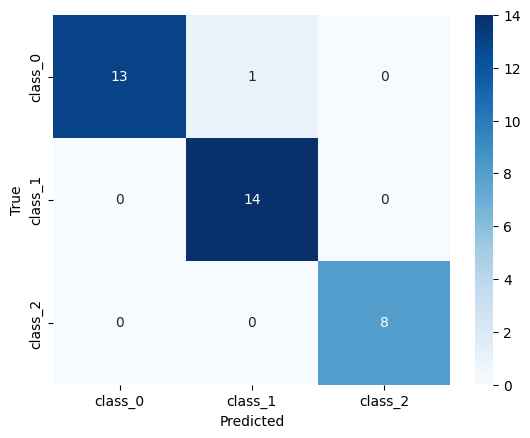

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Breast Cancer Dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
#Exibe as classes de resultados
data.target_names


array(['malignant', 'benign'], dtype='<U9')

A célula acima exibe as classes de resultados: Malígno e Benígno (referentes aos tipos de câncer que serão encontrados)

In [ ]:
# Dividindo o dataset em features (X) e target (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo os dados em conjunto de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [ ]:
#Mostra as características presentes no grupo de dados que serão analisados durante o treinamento
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
311,14.610,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,16.460,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,...,8.678,31.89,54.49,223.6,0.1596,0.30640,0.33930,0.05000,0.2790,0.10660
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,24.090,33.17,177.40,1651.0,0.1247,0.74440,0.72420,0.24930,0.4670,0.10380
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
280,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.720,35.90,159.80,1724.0,0.1782,0.38410,0.57540,0.18720,0.3258,0.09720


In [ ]:
# Fazendo o processo de Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
df_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.113762,-0.831871,0.009226,0.004183,-1.459724,-1.337279,-0.946484,-0.792644,-0.647690,-1.390225,...,0.029198,-0.633178,-0.116682,-0.079211,-1.334604,-1.187003,-1.117329,-0.868203,-0.558203,-1.503072
1,-1.811209,1.450249,-1.786090,-1.346008,-0.693406,0.307145,0.039347,-0.927504,0.877490,2.030459,...,-1.569247,1.032612,-1.581757,-1.141909,1.194105,0.366804,0.339138,-0.993923,-0.150123,1.292364
2,1.354602,1.302789,1.451472,1.203109,-0.391988,2.230007,1.532051,1.332520,1.905574,0.100843,...,1.596423,1.242889,2.077507,1.315796,-0.314475,3.256319,2.260034,2.087992,2.800613,1.134716
3,-0.142196,-0.742927,-0.186745,-0.230087,-0.960523,-0.782541,-0.806408,-0.752159,0.256120,-0.822852,...,-0.303554,-0.886168,-0.251846,-0.372262,-0.928281,-0.271792,-0.682445,-0.686660,0.686442,-0.373637
4,1.379641,1.721763,1.366443,1.295943,0.424688,0.799988,1.297119,1.254443,0.369097,-0.067725,...,1.520424,1.691371,1.553522,1.441488,1.998104,0.879396,1.517427,1.127696,0.584422,0.763117


## Classificação

In [ ]:
mpl = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state=42)


In [ ]:
mpl.fit(X_train_scaled, y_train)


MLPClassifier(max_iter=5000, random_state=42)

In [ ]:
y_pred = mpl.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.985


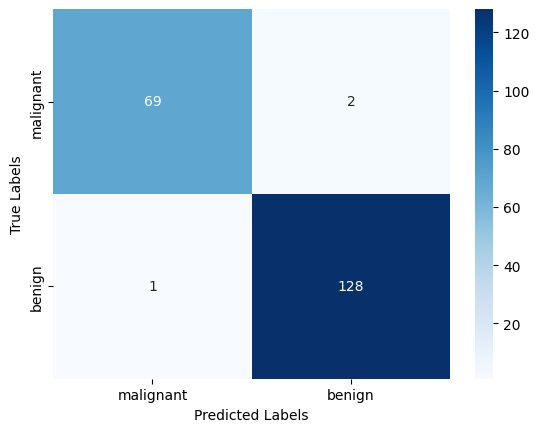

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()